In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(3)
import tensorflow as tf
tf.random.set_seed(3)
import cv2
from tensorflow import keras
from keras.datasets import mnist
import PIL as image
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(type(X_train))

<class 'numpy.ndarray'>


In [5]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


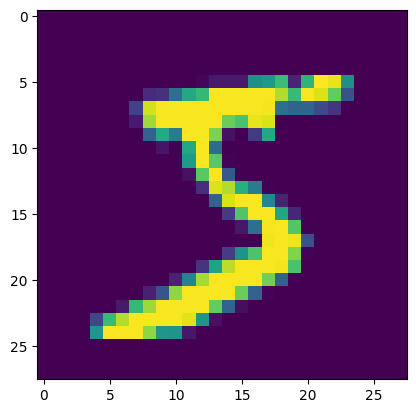

In [6]:
plt.imshow(X_train[0])
plt.show()

In [7]:
print(Y_train[0])

5


In [8]:
print(X_train[0].shape)

(28, 28)


In [9]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
print(np.unique(Y_test))
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape =(28,28)),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(10, activation= 'softmax')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8165 - loss: 0.6078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9471 - loss: 0.1810
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9589 - loss: 0.1392
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9700 - loss: 0.1009
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0888
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9763 - loss: 0.0794
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0722
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0667
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9817 - loss: 0.0613


In [16]:
loss, acc = model.evaluate(X_test, Y_test)
print("\n the accuracy of the model",acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.1356

 the accuracy of the model 0.9674000144004822


In [17]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
print(Y_pred[0])

[3.8478711e-07 1.1150467e-11 4.1299768e-06 1.1855591e-02 4.5991944e-14
 8.5015373e-08 3.5846312e-14 9.8782563e-01 5.0781731e-05 2.6340430e-04]


In [19]:
prediction = np.argmax(Y_pred[0])
prediction

np.int64(7)

In [20]:
print(Y_test[0])

7


**User input data**

Enter the input path/content/images.png


array([[[143, 143, 143],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [113, 113, 113],
        [ 95,  95,  95],
        [195, 195, 195]],

       [[110, 110, 110],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [182, 182, 182]],

       [[113, 113, 113],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [185, 185, 185]],

       ...,

       [[113, 113, 113],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [185, 185, 185]],

       [[113, 113, 113],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [185, 185, 185]],

       [[113, 113, 113],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [185, 185, 185]]], dtype=uint8)
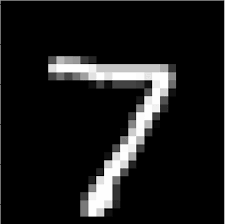

In [21]:
input_data_path = input("Enter the input path")
input_image = cv2.imread(input_data_path)
input_image

In [22]:
input_image.shape

(224, 225, 3)

In [23]:
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale_image.shape

(224, 225)

In [24]:
resize_image = cv2.resize(grayscale_image, (28,28))
resize_image.shape

(28, 28)

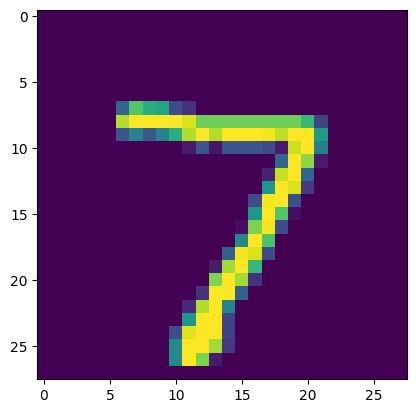

In [25]:
plt.imshow(resize_image)

In [26]:
image_reshaped = np.reshape(resize_image, [1,28,28])

In [27]:
image_reshaped.shape

(1, 28, 28)

In [28]:
image_prediction = model.predict(image_reshaped)
image_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [30]:
prediction = np.argmax(image_prediction)
prediction

np.int64(7)